#Energy Usage Prediction using LSTM

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip drive/MyDrive/HomeC.csv.zip

Archive:  drive/MyDrive/HomeC.csv.zip
  inflating: HomeC.csv               


#Import Packages

In [4]:
## NumPy is a package in Python used for Scientific Computing. NumPy package is used to perform different operations. The ndarray (NumPy Array) is a multidimensional array used to store values of same datatype.
import numpy as np
## Pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.
import pandas as pd
## Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.
import matplotlib
import matplotlib.pyplot as plt
## Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

In [5]:
## `%matplotlib` is a magic function in IPython. With this, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.
%matplotlib inline

#Dataset Analysis

In [6]:
dataset = pd.read_csv("HomeC.csv")
dataset.info()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

In [7]:
dataset.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


> Let's have a look at name and data type of each feature (column).

In [8]:
tmp_str = "Feature(attribute)     DataType"; 
print(tmp_str+"\n"+"-"*len(tmp_str))
print(dataset.dtypes)

Feature(attribute)     DataType
-------------------------------
time                    object
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoi

### The weather and energy dataset
The dataset contains the readings with a time span of 1 minute of house appliances in kW from a smart meter and weather conditions of that particular region.

#### Data Columns Descriptions:
(source: Data Source: https://www.kaggle.com/taranvee/smart-home-dataset-with-weather-information)
##### Index 
- **time**
    * Time of the readings, with a time span of 1 minute.

##### Energy Usage 
- **use [kW]**
    * Total energy consumption
- **gen [kW]**
    * Total energy generated by means of solar or other power generation resources
- **House overall [kW]**
    * overall house energy consumption
- **Dishwasher [kW]** 
    * energy consumed by specific appliance
- **Furnace 1 [kW]**
    * energy consumed by specific appliance
- **Furnace 2 [kW]**
    * energy consumed by specific appliance
- **Home office [kW]**
    * energy consumed by specific appliance
- **Fridge [kW]**
    * energy consumed by specific appliance
- **Wine cellar [kW]**
    * energy consumed by specific appliance
- **Garage door [kW]**
    * energy consumed by specific appliance
- **Kitchen 12 [kW]**
    * energy consumption in kitchen 1
- **Kitchen 14 [kW]**
    * energy consumption in kitchen 2
- **Kitchen 38 [kW]**
    * energy consumption in kitchen 3
- **Barn [kW]**
    * energy consumed by specific appliance
- **Well [kW]**
    * energy consumed by specific appliance
- **Microwave [kW]**
    * energy consumed by specific appliance
- **Living room [kW]**
    * energy consumption in Living room
- **Solar [kW]**
    * Solar power generation

##### Weather
- **temperature**:
    * Temperature is a physical quantity expressing hot and cold.
- **humidity**:
    * Humidity is the concentration of water vapour present in air.
- **visibility**:
    * Visibility sensors measure the meteorological optical range which is defined as the length of atmosphere over which a beam of light travels before its luminous flux is reduced to 5% of its original value.

- **apparentTemperature**:
    * Apparent temperature is the temperature equivalent perceived by humans, caused by the combined effects of air temperature, relative humidity and wind speed. The measure is most commonly applied to the perceived outdoor temperature.
- **pressure**: 
    * Falling air pressure indicates that bad weather is coming, while rising air pressure indicates good weather
- **windSpeed**:
    * Wind speed, or wind flow speed, is a fundamental atmospheric quantity caused by air moving from high to low pressure, usually due to changes in temperature.
- **cloudCover**:
    * Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the sky obscured by clouds when observed from a particular location. Okta is the usual unit of measurement of the cloud cover.
- **windBearing**:
    * In meteorology, an azimuth of 000° is used only when no wind is blowing, while 360° means the wind is from the North. True Wind Direction True North is represented on a globe as the North Pole. All directions relative to True North may be called "true bearings."
- **dewPoint**:
    * the atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form.
- **precipProbability**:
    * A probability of precipitation (POP), also referred to as chance of precipitation or chance of rain, is a measure of the probability that at least some minimum quantity of precipitation will occur within a specified forecast period and location.
- **precipIntensity**:
    * The intensity of rainfall is a measure of the amount of rain that falls over time. The intensity of rain is measured in the height of the water layer covering the ground in a period of time. It means that if the rain stays where it falls, it would form a layer of a certain height.
 
##### Others
- **summary**:
    * Report generated by the by the data collection systm (apparently!).
    * Including:
    ```
    Clear, Mostly Cloudy, Overcast, Partly Cloudy, Drizzle,
       Light Rain, Rain, Light Snow, Flurries, Breezy, Snow,
       Rain and Breezy, Foggy, Breezy and Mostly Cloudy,
       Breezy and Partly Cloudy, Flurries and Breezy, Dry,
       Heavy, Snow.
    ```
- **icon**:
    * The icon that is used by the data collection systm (apparently!).
    * Including:
    ```
    cloudy, clear-night, partly-cloudy-night, clear-day, partly-cloudy-day, rain, snow, wind, fog.
    ```
    

In [9]:
## Return a tuple representing the dimensionality of the DataFrame.
print("Shape of the data: {} --> n_rows = {}, n_cols = {}".format(dataset.shape, dataset.shape[0],dataset.shape[1]))

Shape of the data: (503911, 32) --> n_rows = 503911, n_cols = 32


In [10]:
## pandas.DataFrame.head: This function returns the first n rows for the object based on position. 
#It is useful for quickly testing if your object has the right type of data in it.
dataset.head(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
5,1451624405,1.391867,0.003433,1.391867,0.000283,0.503250,0.063667,0.447033,0.122300,0.006717,0.012433,0.000483,0.000567,0.000000,0.031450,0.001017,0.004067,0.001583,0.003433,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
6,1451624406,1.366217,0.003450,1.366217,0.000283,0.499400,0.063717,0.443267,0.122050,0.006733,0.012417,0.000517,0.000550,0.000000,0.031550,0.001033,0.004117,0.001533,0.003450,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
7,1451624407,1.431900,0.003417,1.431900,0.000250,0.477867,0.178633,0.444283,0.121800,0.006783,0.012550,0.000483,0.000450,0.000000,0.031733,0.001033,0.004200,0.001550,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
8,1451624408,1.627300,0.003417,1.627300,0.000183,0.447650,0.365700,0.441467,0.121617,0.006950,0.012717,0.000467,0.000300,0.000017,0.031767,0.001017,0.004200,0.001567,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
9,1451624409,1.735383,0.003417,1.735383,0.000017,0.171550,0.682500,0.438733,0.121633,0.007233,0.013350,0.000367,0.000050,0.000000,0.031667,0.001017,0.004200,0.001617,0.003417,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [11]:
## This function returns last n rows from the object based on position. 
#It is useful for quickly verifying data, for example, after sorting or appending rows.
dataset.tail(10)

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503901,1452128301,1.537383,0.003183,1.537383,0.000133,0.021683,0.642733,0.042033,0.005283,0.008333,0.013517,0.000500,0.000183,0.000017,0.032017,0.000983,0.003750,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503902,1452128302,1.551817,0.003200,1.551817,0.000050,0.056200,0.624783,0.041750,0.005250,0.008450,0.013483,0.000450,0.000133,0.000033,0.032117,0.001000,0.003800,0.001000,0.003200,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503903,1452128303,1.599617,0.003217,1.599617,0.000067,0.089217,0.638650,0.041750,0.005617,0.008467,0.013450,0.000483,0.000117,0.000017,0.032167,0.000983,0.003783,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503904,1452128304,1.608867,0.003217,1.608867,0.000033,0.114300,0.623283,0.041817,0.005217,0.008350,0.013433,0.000467,0.000117,0.000033,0.032283,0.001017,0.003800,0.001017,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Wee see that the last row is invalid, so let's remove it.

#Data Preprocessing

In [12]:
dataset = dataset[0:-1] ## == dataset[0:dataset.shape[0]-1] == dataset[0:len(dataset)-1] == dataset[:-1]
dataset.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],Garage door [kW],Kitchen 12 [kW],Kitchen 14 [kW],Kitchen 38 [kW],Barn [kW],Well [kW],Microwave [kW],Living room [kW],Solar [kW],temperature,icon,humidity,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,0.013483,0.000467,0.000150,0.000017,0.032283,0.000983,0.003800,0.000967,0.003183,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,0.013433,0.000467,0.000100,0.000033,0.032200,0.000950,0.003800,0.000933,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,0.012933,0.000533,0.000067,0.000000,0.032283,0.001000,0.003750,0.001000,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,0.012817,0.000517,0.000117,0.000017,0.032183,0.000950,0.003767,0.000950,0.003217,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,0.012833,0.000517,0.000117,0.000017,0.032167,0.000950,0.003767,0.000950,0.003233,35.12,rain,0.86,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [13]:
## pandas.DataFrame.columns: The column labels of the DataFrame.
dataset.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

> Let's clean the columns names by removing the `[kW]` uint.

In [14]:
# Python string method replace() returns a copy of the string in which the occurrences of old have been replaced with new, 
#optionally restricting the number of replacements to max.
dataset.columns = [col.replace(' [kW]', '') for col in dataset.columns]
dataset.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

#Feature Engineering

> Sometimes we are only interest in an aggregated result. To make it easy, we can make a new column and save the desired result in that new column.
> For example: if we are interested in the `total` energy usage by both `furnaces` or the `average` usage of all `kitchens`:

In [15]:
dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['avg_Kitchen'] = dataset[['Kitchen 12','Kitchen 14','Kitchen 38']].mean(axis=1)

> If you do not need old columns, you can drop them.

In [16]:
dataset = dataset.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)
dataset.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Home office',
       'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

* In this dataset, time is recorded in the [Unix Time](https://en.wikipedia.org/wiki/Unix_time) format.
> Unix Time represents the number of seconds that have passed since `00:00:00 UTC Thursday, 1 January 1970`.

In [17]:
dataset['time'].head()

0    1451624400
1    1451624401
2    1451624402
3    1451624403
4    1451624404
Name: time, dtype: object

> We would like to convert this large number that represents a unix timestamp (i.e. "1284101485") to a readable date. So, one idea is to now when is the `start time`.

In [18]:
import time 
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(1451624400)))

 start  2016-01-01 05:00:00


In [19]:
import time 
print(' start ' , time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(int(dataset['time'].iloc[0]))))

 start  2016-01-01 05:00:00


>  Data publisher says the dataset contains the readings with a time span of `1 minute` of house appliances
in `kW` from a `smart meter` and `weather conditions` of that particular region.
So, we set `freq='min'` and convert Uinx time to readable date.

In [20]:
time_index = pd.date_range('2016-01-01 05:00', periods=len(dataset),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
dataset = dataset.set_index(time_index)
dataset = dataset.drop(['time'], axis=1)
dataset.iloc[np.r_[0:5,-5:0]].iloc[:,0] #numpy.r is the simple way to build up arrays quickly,
#you can use the array to index your dataframe. For example, here I want to see the first and the last 5 samples

2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, dtype: float64

In [21]:
dataset.shape

(503910, 28)

> We have 500K rows and each row shows the home status at a specific `minute`.
Let's plot the `temperature` data and see what is the result.

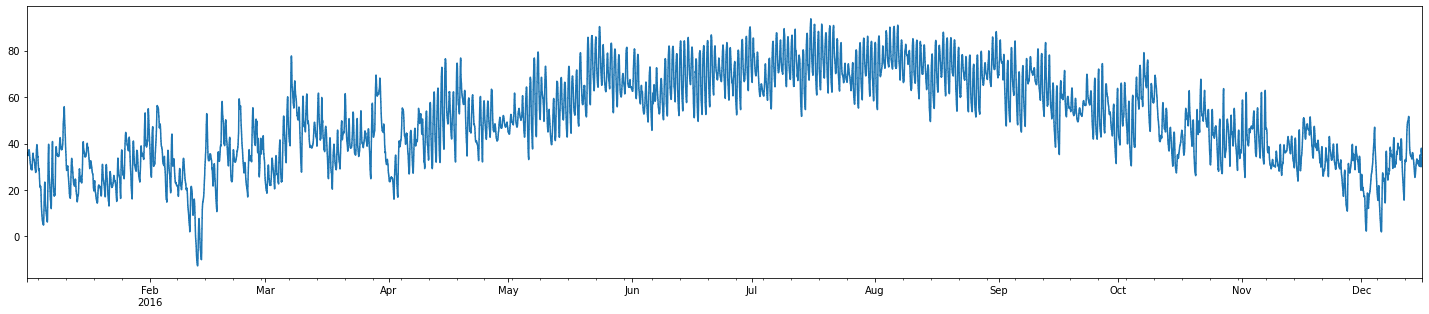

In [22]:
dataset['temperature'].plot(figsize=(25,5))

> It may seem too noisy to you. We can `resample` data by taking the `average temperature` every `day` and then plot it.

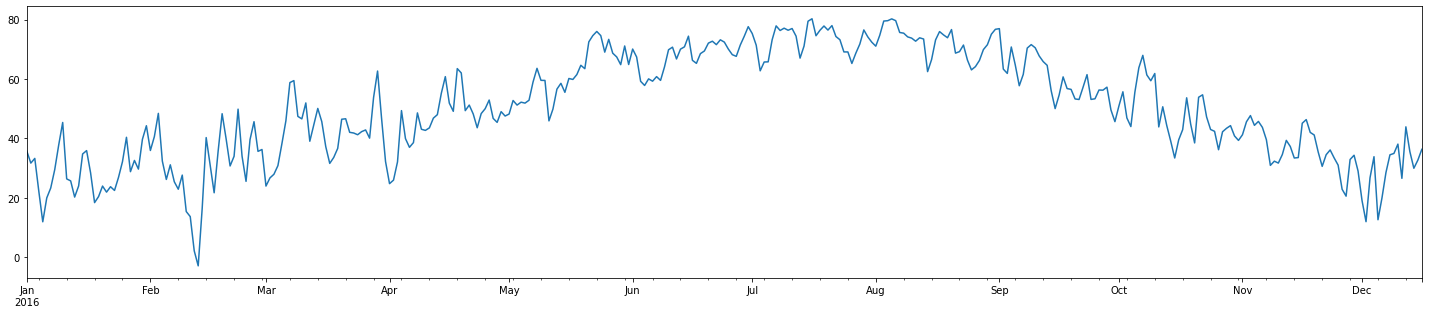

In [23]:
## pandas.DataFrame.resample: Convenience method for frequency conversion and resampling of time series. 
dataset['temperature'].resample(rule='D').mean().plot(figsize=(25,5)) #D calendar day frequency

> Here are the `rule`s you can use:
- B         business day frequency
- C         custom business day frequency (experimental)
- D         calendar day frequency
- W         weekly frequency
- M         month end frequency
- SM        semi-month end frequency (15th and end of month)
- BM        business month end frequency
- CBM       custom business month end frequency
- MS        month start frequency
- SMS       semi-month start frequency (1st and 15th)
- BMS       business month start frequency
- CBMS      custom business month start frequency
- Q         quarter end frequency
- BQ        business quarter endfrequency
- QS        quarter start frequency
- BQS       business quarter start frequency
- A         year end frequency
- BA, BY    business year end frequency
- AS, YS    year start frequency
- BAS, BYS  business year start frequency
- BH        business hour frequency
- H         hourly frequency
- T, min    minutely frequency
- S         secondly frequency
- L, ms     milliseconds
- U, us     microseconds
- N         nanoseconds

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,5)

Now, we look at the dataset columns

In [25]:
dataset.columns

Index(['use', 'gen', 'House overall', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'sum_Furnace', 'avg_Kitchen'],
      dtype='object')

> It seems `use` and `House overall` show the same data. Let's visualize these two columns.

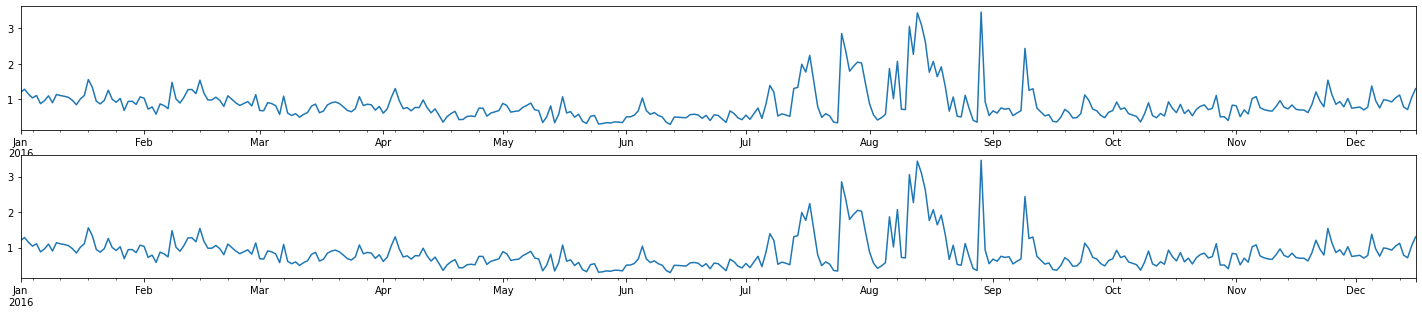

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=1)
dataset['use'].resample('D').mean().plot(ax=axes[0]) #D calendar day frequency
dataset['House overall'].resample('D').mean().plot(ax=axes[1]) #D calendar day frequency

> They are same. It's better to remove one of them.

In [27]:
dataset = dataset.drop(columns=['House overall'])
dataset.shape

(503910, 27)

> Columns `summary` and `icon` are not numerical. 

In [28]:
## pandas.Series.value_counts: Return a Series containing counts of unique values.
dataset['icon'].value_counts()

clear-night            194536
clear-day              182252
rain                    43081
partly-cloudy-day       39492
partly-cloudy-night     27324
snow                     7550
cloudy                   6041
wind                     2660
fog                       974
Name: icon, dtype: int64

In [29]:
## pandas.Series.value_counts: Return a Series containing counts of unique values.
dataset['summary'].value_counts()

Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Dry                             58
Breezy and Mostly Cloudy        58
Name: summary, dtype: int64

In [30]:
dataset = dataset.drop(columns=['summary', 'icon'])
dataset.shape

(503910, 25)

In [31]:
## pandas.Series.unique: Uniques are returned in order of appearance. Hash table-based unique, therefore does NOT sort.
dataset['cloudCover'].unique()

array(['cloudCover', '0.75', '0', '1', '0.31', '0.44', '0.13', '0.19',
       '0.25', '0.16', '0.21', '0.15', '0.14', '0.27', '0.28', '0.17',
       '0.05', '0.1', '0.26', '0.29', '0.11', '0.09', '0.12', '0.06',
       '0.02', '0.08', '0.04', '0.35', '0.22', '0.23', '0.54', '0.39',
       '0.03', '0.07', '0.76', '0.62', '0.18', '0.79', '0.48', '0.24',
       '0.57', 0.24, 1.0, 0.31, 0.28, 0.15, 0.41, 0.1, 0.12, 0.08, 0.09,
       0.19, 0.04, 0.05, 0.29, 0.27, 0.35, 0.18, 0.06, 0.03, 0.11, 0.14,
       0.25, 0.78, 0.0, 0.16, 0.21, 0.23, 0.17, 0.75, 0.26, 0.2, 0.76,
       0.13, 0.77, 0.46, 0.07, 0.55, 0.02, 0.01, 0.51, 0.47, 0.5, 0.4,
       0.3, 0.22, 0.43, 0.33, 0.6, 0.68, 0.66, 0.45, 0.34, 0.52, 0.67,
       0.48, 0.49, 0.39, 0.37, 0.62, 0.36, 0.79, 0.61, 0.38, 0.42, 0.53,
       0.63, 0.44, 0.54, 0.32, 0.56, 0.58, 0.72, 0.57, 0.73, 0.71, 0.64,
       0.59], dtype=object)

> We see that for some rows we have an invalid value for `cloudCover`. 

In [32]:
dataset[dataset['cloudCover']=='cloudCover'].shape

(58, 25)

> There are plenty of ways deal with this kind of invalid values. The simplest one is to remove rows that include this invalid value. but more sophisticated way is to replace them. see this: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [33]:
dataset['cloudCover'][56:60]

2016-01-01 05:56:00    cloudCover
2016-01-01 05:57:00    cloudCover
2016-01-01 05:58:00          0.75
2016-01-01 05:59:00          0.75
Freq: T, Name: cloudCover, dtype: object

> We replace this missing valuess with the next valid observation  we have.

In [34]:
dataset['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
dataset['cloudCover'] = dataset['cloudCover'].astype('float')
dataset['cloudCover'].unique()

array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

In [35]:
dataset['cloudCover'][56:60]

2016-01-01 05:56:00    0.75
2016-01-01 05:57:00    0.75
2016-01-01 05:58:00    0.75
2016-01-01 05:59:00    0.75
Freq: T, Name: cloudCover, dtype: float64

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503910 entries, 2016-01-01 05:00:00 to 2016-12-16 03:29:00
Freq: T
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   use                  503910 non-null  float64
 1   gen                  503910 non-null  float64
 2   Dishwasher           503910 non-null  float64
 3   Home office          503910 non-null  float64
 4   Fridge               503910 non-null  float64
 5   Wine cellar          503910 non-null  float64
 6   Garage door          503910 non-null  float64
 7   Barn                 503910 non-null  float64
 8   Well                 503910 non-null  float64
 9   Microwave            503910 non-null  float64
 10  Living room          503910 non-null  float64
 11  Solar                503910 non-null  float64
 12  temperature          503910 non-null  float64
 13  humidity             503910 non-null  float64
 14  visibility           50391

In [37]:
dataset = dataset.resample('D').mean()
print("Shape of daily dataset: {} --> n_rows = {}, n_cols = {}".format(dataset.shape, dataset.shape[0],dataset.shape[1]))

Shape of daily dataset: (351, 25) --> n_rows = 351, n_cols = 25


# Time-Series Prediction with LSTM



In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
usedf = dataset['use']

In [40]:
usedf.head()

2016-01-01    1.198482
2016-01-02    1.285779
2016-01-03    1.146617
2016-01-04    1.042143
2016-01-05    1.109701
Freq: D, Name: use, dtype: float64

In [41]:
usedf=usedf.to_frame()

In [42]:
usedf.head()

,use
2016-01-01,1.198482
2016-01-02,1.285779
2016-01-03,1.146617
2016-01-04,1.042143
2016-01-05,1.109701


In [43]:
usedf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 351 entries, 2016-01-01 to 2016-12-16
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   use     351 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [44]:
# This function is used to prepare the time-series data
# according to the problem definition.
def add_lags(series, times):
  cols = []
  column_index = []
  for time in times:
    cols.append(series.shift(-time))
    lag_fmt = "t+{time}" if time > 0 else "t{time}" if time < 0 else "t"
    column_index += [(lag_fmt.format(time=time), col_name)
        for col_name in series.columns]
  df = pd.concat(cols, axis=1)
  df.columns = pd.MultiIndex.from_tuples(column_index)
  return df

In [45]:
X = add_lags(usedf, times=range(-30+1,1)).iloc[30:-5]
y = add_lags(usedf, times=[5]).iloc[30:-5]

In [46]:
X.head()

,t-29,t-28,t-27,t-26,t-25,t-24,t-23,t-22,t-21,t-20,t-19,t-18,t-17,t-16,t-15,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use,use
2016-01-31,1.285779,1.146617,1.042143,1.109701,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224
2016-02-01,1.146617,1.042143,1.109701,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224,1.033505
2016-02-02,1.042143,1.109701,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224,1.033505,0.725450
2016-02-03,1.109701,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224,1.033505,0.725450,0.789036
2016-02-04,0.880044,0.964197,1.100592,0.905353,1.137600,1.108112,1.087707,1.057835,0.972452,0.849664,1.011319,1.111196,1.559358,1.338234,0.947373,0.871978,0.972101,1.257965,1.001793,0.919517,1.025885,0.689653,0.942827,0.946987,0.859326,1.070224,1.033505,0.725450,0.789036,0.584781


In [47]:
y.head()

,t+5
,use
2016-01-31,0.872563
2016-02-01,0.823736
2016-02-02,0.739130
2016-02-03,1.480771
2016-02-04,1.011274


In [48]:
train_slice = slice(None, "2016-10-30")

In [49]:
test_slice = slice("2016-11-1", None)

In [50]:
# Split the dataset into 80% training and 20% testing as follows
X_train, y_train = X.loc[train_slice], y.loc[train_slice]
X_test, y_test = X.loc[test_slice], y.loc[test_slice]

In [51]:
print(X_train.shape)

(274, 30)


In [52]:
print(X_test.shape)

(41, 30)


In [53]:
def multilevel_df_to_ndarray(df):
  shape = [-1] + [len(level) for level in df.columns.remove_unused_levels().levels]
  return df.values.reshape(shape)

In [54]:
X_train_3D = multilevel_df_to_ndarray(X_train)
X_test_3D = multilevel_df_to_ndarray(X_test)

In [55]:
print(X_train_3D.shape)

(274, 30, 1)


In [56]:
print(X_test_3D.shape)

(41, 30, 1)


In [57]:
y_train = y_train.values
y_test = y_test.values

In [58]:
print(y_train.shape)

(274, 1)


In [59]:
print(y_test.shape)

(41, 1)


In [60]:
model_LSTM = keras.models.Sequential()
model_LSTM.add(keras.layers.LSTM(units = 100, return_sequences = True,input_shape = X_train_3D.shape[1:]))
model_LSTM.add(keras.layers.LSTM(units = 50))
model_LSTM.add(keras.layers.Dense(1))
model_LSTM.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 100)           40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


The number of parameters of LSTM:
Input vectors of size m 
Output vectors of size n 
4(nm + n^2 )
LSTM with  bias vectors: 4(nm + n^2 + n) (default in keras )

=4 ( 100 x 1 + 100x100 + 100) = 4x 10200 = 40,800

= 4 (50 x 100 + 50x50 +50) = 4x7500 = 30200

= 50 + 1 = 51

In [61]:
model_LSTM.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [62]:
history_LSTM = model_LSTM.fit(x=X_train_3D, y=y_train,epochs=50, validation_split=0.1, batch_size=32)

Epoch 1/50
8/8 [==============================] - 4s 156ms/step - loss: 0.6179 - mae: 0.5590 - val_loss: 0.0598 - val_mae: 0.2023
Epoch 2/50
8/8 [==============================] - 0s 35ms/step - loss: 0.2759 - mae: 0.3567 - val_loss: 0.0360 - val_mae: 0.1530
Epoch 3/50
8/8 [==============================] - 0s 33ms/step - loss: 0.2529 - mae: 0.3193 - val_loss: 0.0515 - val_mae: 0.1865
Epoch 4/50
8/8 [==============================] - 0s 31ms/step - loss: 0.2204 - mae: 0.3365 - val_loss: 0.0333 - val_mae: 0.1517
Epoch 5/50
8/8 [==============================] - 0s 53ms/step - loss: 0.2771 - mae: 0.3402 - val_loss: 0.0363 - val_mae: 0.1560
Epoch 6/50
8/8 [==============================] - 0s 30ms/step - loss: 0.2355 - mae: 0.3161 - val_loss: 0.0351 - val_mae: 0.1543
Epoch 7/50
8/8 [==============================] - 0s 30ms/step - loss: 0.3028 - mae: 0.3568 - val_loss: 0.0359 - val_mae: 0.1554
Epoch 8/50
8/8 [==============================] - 0s 29ms/step - loss: 0.2708 - mae: 0.3363 - va

In [63]:
test_loss, test_mae = model_LSTM.evaluate(x=X_test_3D, y=y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.0504 - mae: 0.1612


In [64]:
print(test_loss, test_mae)

0.05036124959588051 0.16120696067810059


#Exercise: Hyper Parameter Tuning

In [65]:
model_LSTM = keras.models.Sequential()
model_LSTM.add(keras.layers.LSTM(units = 100, return_sequences = True,input_shape = X_train_3D.shape[1:]))
model_LSTM.add(keras.layers.LSTM(units = 50))
model_LSTM.add(keras.layers.Dense(1))
model_LSTM.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 100)           40800     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________
